In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings('ignore')

In [290]:
df=pd.read_csv("titanic-training-data.csv")

In [291]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [292]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [293]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [294]:
df.shape

(891, 12)

In [295]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [296]:
median1=df["Age"].median()

In [297]:
median1

28.0

In [298]:
df["Age"]=df["Age"].replace(np.nan,median1)

In [299]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [300]:
mode1=df["Embarked"].mode().values[0]

In [301]:
mode1

'S'

In [302]:
df["Embarked"]=df["Embarked"].replace(np.nan,mode1)

In [303]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Drop insignificant columns

In [304]:
df=df.drop(["Cabin","PassengerId","Name","Ticket"],axis=1)

In [305]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [306]:
duplicate= df.duplicated()
print(duplicate.sum())

116


<Axes: xlabel='Age'>

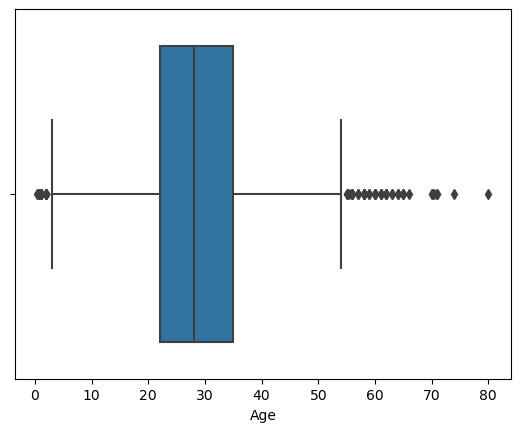

In [307]:
sns.boxplot(x="Age",data=df)

In [308]:
 def remove_outlier(col):
        sorted(col)
        Q1,Q3=col.quantile([0.25,0.75])
        IQR=Q3-Q1
        lower_range=Q1-(1.5*IQR)
        upper_range=Q3+(1.5*IQR)
        return lower_range,upper_range
    

In [309]:
lowAge,uppAge=remove_outlier(df['Age'])
df['Age']=np.where(df['Age']>uppAge,uppAge,df['Age'])
df['Age']=np.where(df['Age']<lowAge,lowAge,df['Age'])

<Axes: xlabel='Age'>

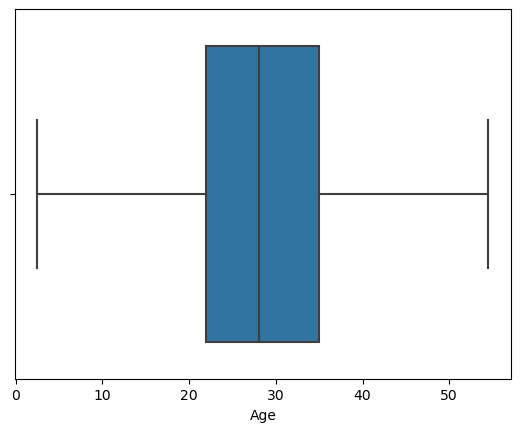

In [310]:
sns.boxplot(x="Age",data=df)

<Axes: xlabel='Fare'>

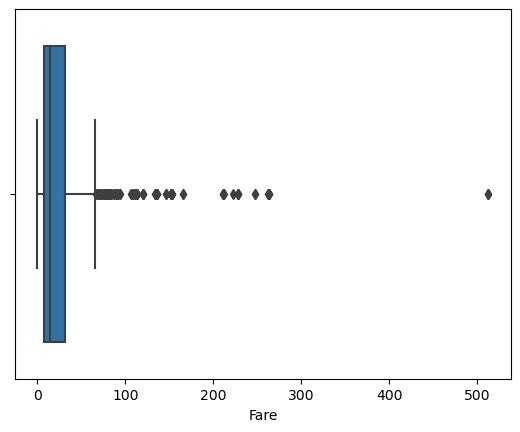

In [311]:
sns.boxplot(x="Fare",data=df)

In [312]:
def remove_outlier(col):
        sorted(col)
        Q1,Q3=col.quantile([0.25,0.75])
        IQR=Q3-Q1
        lower_range=Q1-(1.5*IQR)
        upper_range=Q3+(1.5*IQR)
        return lower_range,upper_range
    

In [313]:
lowAge,uppAge=remove_outlier(df['Fare'])
df['Fare']=np.where(df['Fare']>uppAge,uppAge,df['Fare'])
df['Fare']=np.where(df['Fare']<lowAge,lowAge,df['Fare'])

<Axes: xlabel='Fare'>

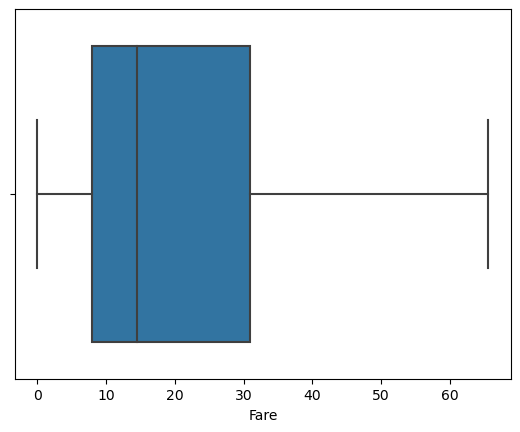

In [314]:
sns.boxplot(x="Fare",data=df)

### Encoding

In [315]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [316]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,65.6344,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [317]:
df=pd.get_dummies(df,columns=["Sex","Embarked"])


In [318]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,65.6344,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


### Dataset-2(Pima diabets dataset)

In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings('ignore')

In [320]:
df=pd.read_csv("pima-indians-diabetes-2.csv")

In [321]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [322]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [323]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [324]:
duplicate= df.duplicated()
print(duplicate.sum())

0


<Axes: xlabel='test'>

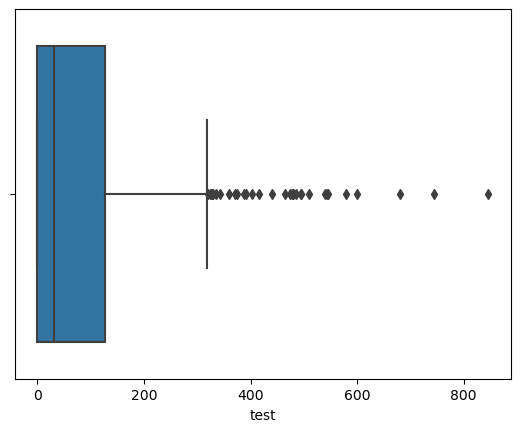

In [325]:
sns.boxplot(x="test",data=df)

In [326]:
 def remove_outlier(col):
        sorted(col)
        Q1,Q3=col.quantile([0.25,0.75])
        IQR=Q3-Q1
        lower_range=Q1-(1.5*IQR)
        upper_range=Q3+(1.5*IQR)
        return lower_range,upper_range
    

In [327]:
lowAge,uppAge=remove_outlier(df['test'])
df['test']=np.where(df['test']>uppAge,uppAge,df['test'])
df['test']=np.where(df['test']<lowAge,lowAge,df['test'])

<Axes: xlabel='test'>

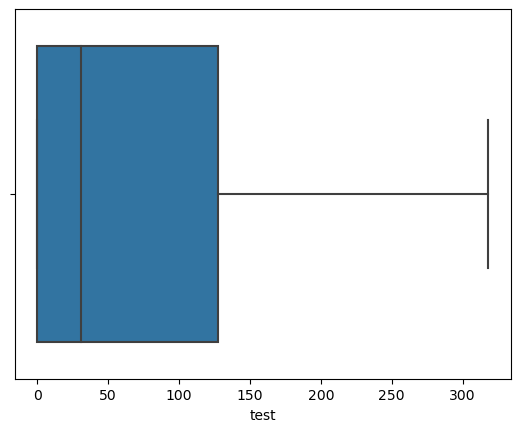

In [328]:
sns.boxplot(x="test",data=df)

### Encoding

In [329]:
df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test     float64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [330]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0.0,33.6,0.627,50,1
1,1,85,66,29,0.0,26.6,0.351,31,0
2,8,183,64,0,0.0,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [331]:
df=pd.get_dummies(df,columns=["Preg","skin"])

In [332]:
df.head()

,Plas,Pres,test,mass,pedi,age,class,Preg_0,Preg_1,Preg_2,Preg_3,Preg_4,Preg_5,Preg_6,Preg_7,Preg_8,Preg_9,Preg_10,Preg_11,Preg_12,Preg_13,Preg_14,Preg_15,Preg_17,skin_0,skin_7,skin_8,skin_10,skin_11,skin_12,skin_13,skin_14,skin_15,skin_16,skin_17,skin_18,skin_19,skin_20,skin_21,skin_22,skin_23,skin_24,skin_25,skin_26,skin_27,skin_28,skin_29,skin_30,skin_31,skin_32,skin_33,skin_34,skin_35,skin_36,skin_37,skin_38,skin_39,skin_40,skin_41,skin_42,skin_43,skin_44,skin_45,skin_46,skin_47,skin_48,skin_49,skin_50,skin_51,skin_52,skin_54,skin_56,skin_60,skin_63,skin_99
0,148,72,0.0,33.6,0.627,50,1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,85,66,0.0,26.6,0.351,31,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,183,64,0.0,23.3,0.672,32,1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,89,66,94.0,28.1,0.167,21,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,137,40,168.0,43.1,2.288,33,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Dataset3-auto-mpg

In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings('ignore')

In [334]:
df=pd.read_csv("auto-mpg.csv")


In [335]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [336]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [337]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [338]:
duplicate= df.duplicated()
print(duplicate.sum())

0


In [345]:
df['horsepower']=df['horsepower'].replace(to_replace='??',value=np.nan)
df['horsepower']=df['horsepower'].astype(object)


In [341]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [342]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<Axes: xlabel='acceleration'>

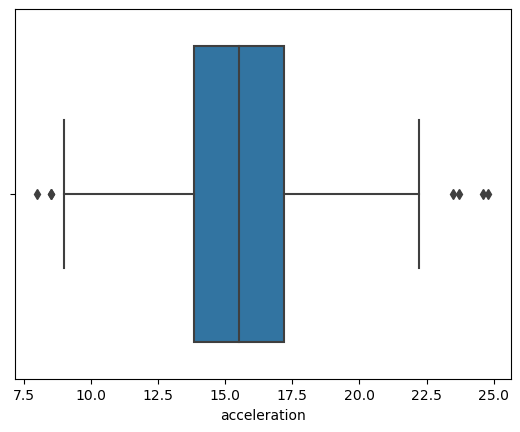

In [343]:
sns.boxplot(x="acceleration",data=df)